# Importing important Libraries


In [45]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score , recall_score , f1_score , confusion_matrix
from sklearn.metrics import precision_recall_curve , PrecisionRecallDisplay 
from sklearn.metrics import roc_curve , RocCurveDisplay , roc_auc_score
from sklearn.model_selection  import cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.metrics import plot_confusion_matrix
import graphviz
from sklearn.tree import export_graphviz
from sklearn.svm import SVC  


# Reading Data

In [46]:
df=pd.read_csv("data.csv",index_col =0)

In [47]:
df.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 863 entries, 0 to 862
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   location      863 non-null    int64  
 1   country       863 non-null    int64  
 2   gender        863 non-null    int64  
 3   age           863 non-null    float64
 4   vis_wuhan     863 non-null    int64  
 5   from_wuhan    863 non-null    int64  
 6   symptom1      863 non-null    int64  
 7   symptom2      863 non-null    int64  
 8   symptom3      863 non-null    int64  
 9   symptom4      863 non-null    int64  
 10  symptom5      863 non-null    int64  
 11  symptom6      863 non-null    int64  
 12  diff_sym_hos  863 non-null    int64  
 13  result        863 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 101.1 KB


# splitting the data

In [49]:
X = df.drop(columns=['result'])
y = df['result'].values
X.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0


In [50]:
train_ratio = 0.65
validation_ratio = 0.15
test_ratio = 0.20
# In the first step we will split the data in training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X,y, test_size=1 - train_ratio, random_state=1)
# we have to define valid=15% of the remaining data 
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=test_ratio/(test_ratio + validation_ratio), random_state=1)
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)
print(X_train, X_valid, X_test)

(560, 13)
(129, 13)
(174, 13)
     location  country  gender   age  vis_wuhan  from_wuhan  symptom1  \
685        63       13       0  28.0          0           0         2   
635        85       12       2  49.4          0           0        14   
850        10        4       0  49.4          0           0        14   
173        96       11       2  49.4          0           0        14   
744        45       13       0  58.0          0           0        14   
..        ...      ...     ...   ...        ...         ...       ...   
715        45       13       1  51.0          0           0         6   
767       122       31       2  49.4          0           0        14   
72        135        8       0  39.0          1           0        14   
235       128       18       0  85.0          0           0        14   
37         13        8       0  33.0          0           1        14   

     symptom2  symptom3  symptom4  symptom5  symptom6  diff_sym_hos  
685        27        19

# Choosing the best hyper-parameter (K) From 1 to 30

In [51]:
k_range = range(1, 30)
cv_scores_means=[]
F1_Scores=[]
Precision_Scores=[]
Recall_Scores=[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    cv_scores=(cross_val_score(knn, X, y, cv=5))
    print("k=",k)
    print ("Accuracy Score: %f%%"% (metrics.accuracy_score(y_test,y_pred)*100))
    P_S=precision_score(y_test,y_pred, average='binary')
    R_S=recall_score(y_test,y_pred, average='binary')
    print ("Precision Score:",P_S)
    print ("Recall Score:",R_S)
    F1_KNN = f1_score(y_test,y_pred)
    print("F1 score is: " , F1_KNN)
    cv_scores_means.append(np.mean(cv_scores))
    F1_Scores.append(F1_KNN)
    Precision_Scores.append(P_S)
    Recall_Scores.append(R_S)
    print("\n")


k= 1
Accuracy Score: 91.954023%
Precision Score: 0.6666666666666666
Recall Score: 0.5263157894736842
F1 score is:  0.5882352941176471


k= 2
Accuracy Score: 93.678161%
Precision Score: 1.0
Recall Score: 0.42105263157894735
F1 score is:  0.5925925925925926


k= 3
Accuracy Score: 93.103448%
Precision Score: 0.7333333333333333
Recall Score: 0.5789473684210527
F1 score is:  0.6470588235294117


k= 4
Accuracy Score: 91.379310%
Precision Score: 0.6666666666666666
Recall Score: 0.42105263157894735
F1 score is:  0.5161290322580646


k= 5
Accuracy Score: 91.954023%
Precision Score: 0.6666666666666666
Recall Score: 0.5263157894736842
F1 score is:  0.5882352941176471


k= 6
Accuracy Score: 91.954023%
Precision Score: 0.7777777777777778
Recall Score: 0.3684210526315789
F1 score is:  0.5


k= 7
Accuracy Score: 91.954023%
Precision Score: 0.7272727272727273
Recall Score: 0.42105263157894735
F1 score is:  0.5333333333333333


k= 8
Accuracy Score: 91.379310%
Precision Score: 0.7
Recall Score: 0.368421

# Graphs

Text(0, 0.5, 'Testing Accuracy')

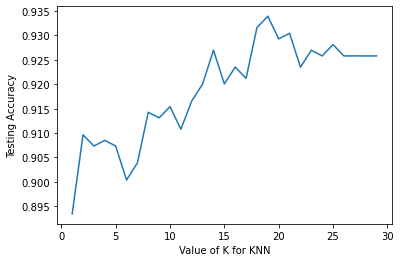

In [52]:
plt.plot(k_range,cv_scores_means)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')



Text(0, 0.5, 'Precision/Recall/F1 SCORE')

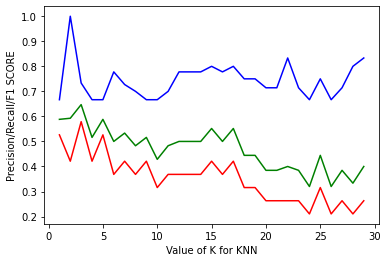

In [53]:
plt.plot(k_range,F1_Scores,"g")
plt.plot(k_range,Precision_Scores,"b",label="actual current values")
plt.plot(k_range,Recall_Scores,"r",label="actual current values")
plt.xlabel('Value of K for KNN')
plt.ylabel('Precision/Recall/F1 SCORE')

Text(0, 0.5, 'Precision/Recall')

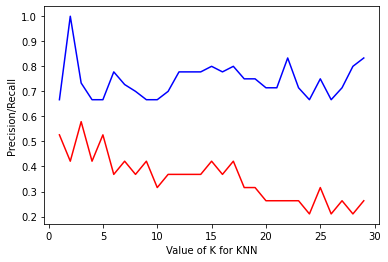

In [54]:
plt.plot(k_range,Precision_Scores,"b",label="actual current values")
plt.plot(k_range,Recall_Scores,"r",label="actual current values")
plt.xlabel('Value of K for KNN')
plt.ylabel('Precision/Recall')

# The best hyper-parameter (K) According to accuracy only

In [55]:
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)
print(knn_gscv.best_params_)
print("\n")
knn_gscv.best_score_

{'n_neighbors': 19}




0.933942734238473

# Metrics

In [56]:
knn = KNeighborsClassifier(n_neighbors =3)
knn.fit(X_train,y_train)
y_predict=knn.predict(X_test)
print(y_predict)
print(classification_report(y_test,y_predict,digits=6))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
              precision    recall  f1-score   support

           0   0.949686  0.974194  0.961783       155
           1   0.733333  0.578947  0.647059        19

    accuracy                       0.931034       174
   macro avg   0.841509  0.776570  0.804421       174
weighted avg   0.926061  0.931034  0.927417       174



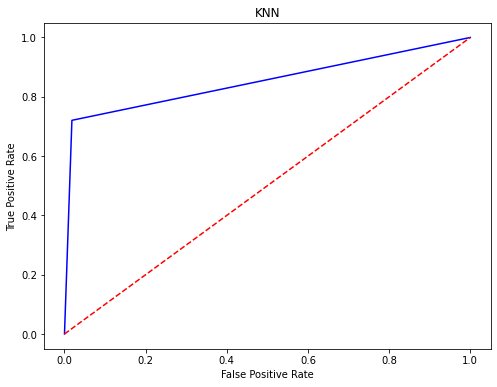

In [57]:
y_scores = cross_val_predict(knn,X_train,y_train, cv=10)
fpr, tpr, threshold = roc_curve(y_train, y_scores)
plt.figure(figsize = (8,6))
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.title("KNN")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# AUC of KNN

In [58]:
AUC_of_knn = roc_auc_score(y_train, y_scores)
print("Area Under the Curve is: " , AUC_of_knn)

Area Under the Curve is:  0.8511477761836442


# Naive Bayes

In [59]:
gnb = GaussianNB(priors=None, var_smoothing=1*(10**(-24)))
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print(y_pred)
print ("Accuracy Score: %f%%"% (metrics.accuracy_score(y_test,y_pred)*100))
P_S=precision_score(y_test,y_pred, average='binary')
R_S=recall_score(y_test,y_pred, average='binary')
print ("Precision Score:",P_S)
print ("Recall Score:",R_S)
F1_KNN = f1_score(y_test,y_pred)
print("F1 score is: " , F1_KNN)

[0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0]
Accuracy Score: 86.206897%
Precision Score: 0.3333333333333333
Recall Score: 0.2631578947368421
F1 score is:  0.29411764705882354


# Selecting best hyper-parameter 

In [60]:
k_range = range(1, 30)
cv_scores_means=[]
F1_Scores=[]
Precision_Scores=[]
Recall_Scores=[]
for k in k_range:
    gnb = GaussianNB(priors=None, var_smoothing=1*(10**(-k)))
    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    cv_scores=(cross_val_score(gnb, X, y, cv=5))
    print("x=",k)
    print ("Accuracy Score: %f%%"% (metrics.accuracy_score(y_test,y_pred)*100))
    P_S=precision_score(y_test,y_pred, average='binary')
    R_S=recall_score(y_test,y_pred, average='binary')
    print ("Precision Score:",P_S)
    print ("Recall Score:",R_S)
    F1_KNN = f1_score(y_test,y_pred)
    print("F1 score is: " , F1_KNN)
    cv_scores_means.append(np.mean(cv_scores))
    F1_Scores.append(F1_KNN)
    Precision_Scores.append(P_S)
    Recall_Scores.append(R_S)
    print("\n")

x= 1
Accuracy Score: 90.804598%
Precision Score: 1.0
Recall Score: 0.15789473684210525
F1 score is:  0.2727272727272727


x= 2
Accuracy Score: 89.080460%
Precision Score: 0.5
Recall Score: 0.21052631578947367
F1 score is:  0.2962962962962963


x= 3
Accuracy Score: 85.632184%
Precision Score: 0.2857142857142857
Recall Score: 0.21052631578947367
F1 score is:  0.24242424242424243


x= 4
Accuracy Score: 84.482759%
Precision Score: 0.25
Recall Score: 0.21052631578947367
F1 score is:  0.22857142857142856


x= 5
Accuracy Score: 84.482759%
Precision Score: 0.25
Recall Score: 0.21052631578947367
F1 score is:  0.22857142857142856


x= 6
Accuracy Score: 85.057471%
Precision Score: 0.29411764705882354
Recall Score: 0.2631578947368421
F1 score is:  0.27777777777777773


x= 7
Accuracy Score: 85.057471%
Precision Score: 0.29411764705882354
Recall Score: 0.2631578947368421
F1 score is:  0.27777777777777773


x= 8
Accuracy Score: 85.057471%
Precision Score: 0.29411764705882354
Recall Score: 0.263157894

# Graphs

Text(0, 0.5, 'Precision/Recall/F1 SCORE')

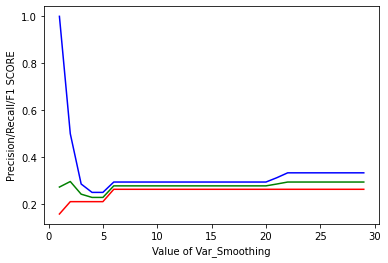

In [61]:
plt.plot(k_range,F1_Scores,"g")
plt.plot(k_range,Precision_Scores,"b",label="actual current values")
plt.plot(k_range,Recall_Scores,"r",label="actual current values")
plt.xlabel('Value of Var_Smoothing')
plt.ylabel('Precision/Recall/F1 SCORE')

Text(0, 0.5, 'Precision/Recall')

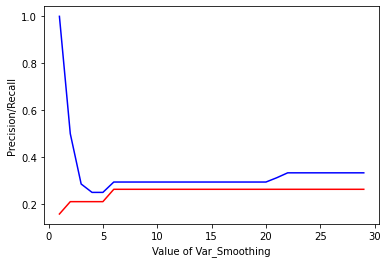

In [62]:
plt.plot(k_range,Precision_Scores,"b",label="actual current values")
plt.plot(k_range,Recall_Scores,"r",label="actual current values")
plt.xlabel('Value of Var_Smoothing')
plt.ylabel('Precision/Recall')

# Metrics 

In [63]:
gnb = GaussianNB(priors=None, var_smoothing=1*(10**(-22)))
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print(y_pred)
print(classification_report(y_test,y_pred,digits=6))

[0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0]
              precision    recall  f1-score   support

           0   0.911950  0.935484  0.923567       155
           1   0.333333  0.263158  0.294118        19

    accuracy                       0.862069       174
   macro avg   0.622642  0.599321  0.608842       174
weighted avg   0.848767  0.862069  0.854834       174



# Naive Bayes ROC 

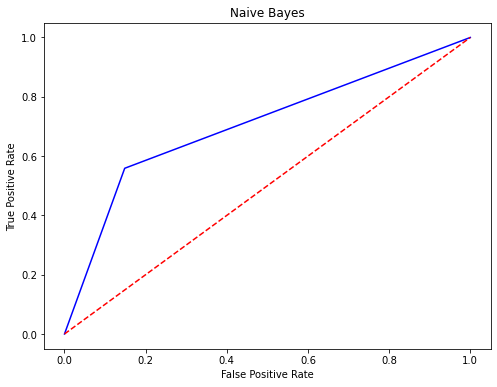

Area Under the Curve is:  0.7052247728359636


In [64]:
y_scores = cross_val_predict(gnb,X_train,y_train, cv=10)
fpr_NB, tpr_NB, threshold_NB = roc_curve(y_train, y_scores)
plt.figure(figsize = (8,6))
plt.plot(fpr_NB, tpr_NB, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.title("Naive Bayes")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()
AUC_of_Naive_Bayes = roc_auc_score(y_train, y_scores)
print("Area Under the Curve is: " , AUC_of_Naive_Bayes)

# Comparing KNN & Naive Bayes

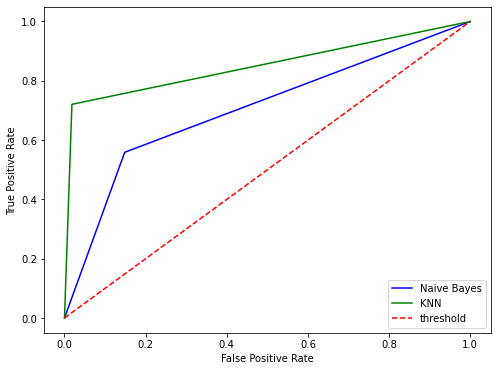

In [65]:
plt.figure(figsize = (8,6))
plt.plot(fpr_NB, tpr_NB, 'b')
plt.plot(fpr, tpr, 'g')
plt.plot([0, 1], [0, 1],'r--')
plt.legend(["Naive Bayes", "KNN" , "threshold"], loc ="lower right")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# Compare AUC for KNN & Naive Bayes

In [66]:
print("Area Under the Curve in KNN is: " , AUC_of_knn)
print("Area Under the Curve in Naive Bayes is: " , AUC_of_Naive_Bayes)

Area Under the Curve in KNN is:  0.8511477761836442
Area Under the Curve in Naive Bayes is:  0.7052247728359636


# applying logistic regrission

In [67]:
logreg = LogisticRegression(max_iter=5000,C=3)
corona_model = Pipeline([('log_reg', logreg)])
corona_model.fit(X_train,y_train)

Pipeline(steps=[('log_reg', LogisticRegression(C=3, max_iter=5000))])

# training the model

In [68]:
y_train_hat = corona_model.predict(X_train)
y_train_hat_probs = corona_model.predict_proba(X_train)[:,1]

train_accuracy = accuracy_score(y_train, y_train_hat)*100
train_auc_roc = roc_auc_score(y_train, y_train_hat_probs)*100

print('Confusion matrix:\n') 
confusion_matrix=pd.crosstab(y_train, y_train_hat,rownames=['Actual'],colnames=['predicted'])

print('Training AUC: %.4f %%' % train_auc_roc)
print('Training accuracy: %.4f %%' % train_accuracy)
print(confusion_matrix)

Confusion matrix:

Training AUC: 96.7300 %
Training accuracy: 96.4286 %
predicted    0   1
Actual            
0          486   6
1           14  54


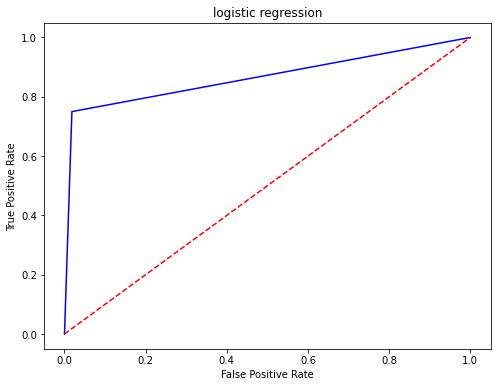

Area Under the Curve is:  0.8658536585365854


In [69]:
y_scores_log = cross_val_predict(corona_model,X_train,y_train, cv=10)
fpr_log, tpr_log, threshold_log = roc_curve(y_train, y_scores_log)
plt.figure(figsize = (8,6))
plt.plot(fpr_log, tpr_log, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.title("logistic regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()
AUC_of_LR = roc_auc_score(y_train, y_scores_log)
print("Area Under the Curve is: " , AUC_of_LR)

In [70]:
LR = LogisticRegression(max_iter=5000, C=3)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
print(y_pred)
print(classification_report(y_test,y_pred,digits=6))

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
              precision    recall  f1-score   support

           0   0.938650  0.987097  0.962264       155
           1   0.818182  0.473684  0.600000        19

    accuracy                       0.931034       174
   macro avg   0.878416  0.730390  0.781132       174
weighted avg   0.925496  0.931034  0.922707       174



# Comparing KNN & NB & LR

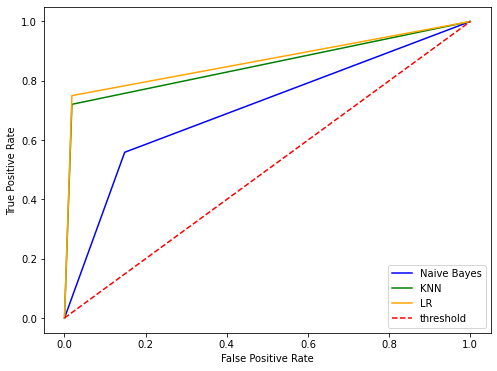

In [71]:
plt.figure(figsize = (8,6))
plt.plot(fpr_NB, tpr_NB, 'b')
plt.plot(fpr, tpr, 'g')
plt.plot(fpr_log,tpr_log,'orange')
plt.plot([0, 1], [0, 1],'r--')
plt.legend(["Naive Bayes", "KNN" ,"LR", "threshold"], loc ="lower right")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [72]:
print("Area Under the Curve in Logistic regression is: " , AUC_of_LR)
print("Area Under the Curve in KNN is: " , AUC_of_knn)
print("Area Under the Curve in Naive Bayes is: " , AUC_of_Naive_Bayes)

Area Under the Curve in Logistic regression is:  0.8658536585365854
Area Under the Curve in KNN is:  0.8511477761836442
Area Under the Curve in Naive Bayes is:  0.7052247728359636


# Print function for Train & Test

# Decision Tree with the best tunning hyper-parameters



In [73]:
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}

tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="recall", n_jobs=-1, verbose=1, cv=5)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)

Fitting 5 folds for each of 4332 candidates, totalling 21660 fits
Best paramters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'})


DecisionTreeClassifier(max_depth=8)

# Classification reprot for DT with best tunning Hyper-Parameters

In [74]:
pred = tree_clf.predict(X_train)
print(pred)
print(classification_report(y_train,pred,digits=6))

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 

In [75]:
pred = tree_clf.predict(X_test)
print(pred)
print(classification_report(y_test,pred,digits=6))

[0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
              precision    recall  f1-score   support

           0   0.968553  0.993548  0.980892       155
           1   0.933333  0.736842  0.823529        19

    accuracy                       0.965517       174
   macro avg   0.950943  0.865195  0.902211       174
weighted avg   0.964708  0.965517  0.963708       174



# Decision Tree Visualization 

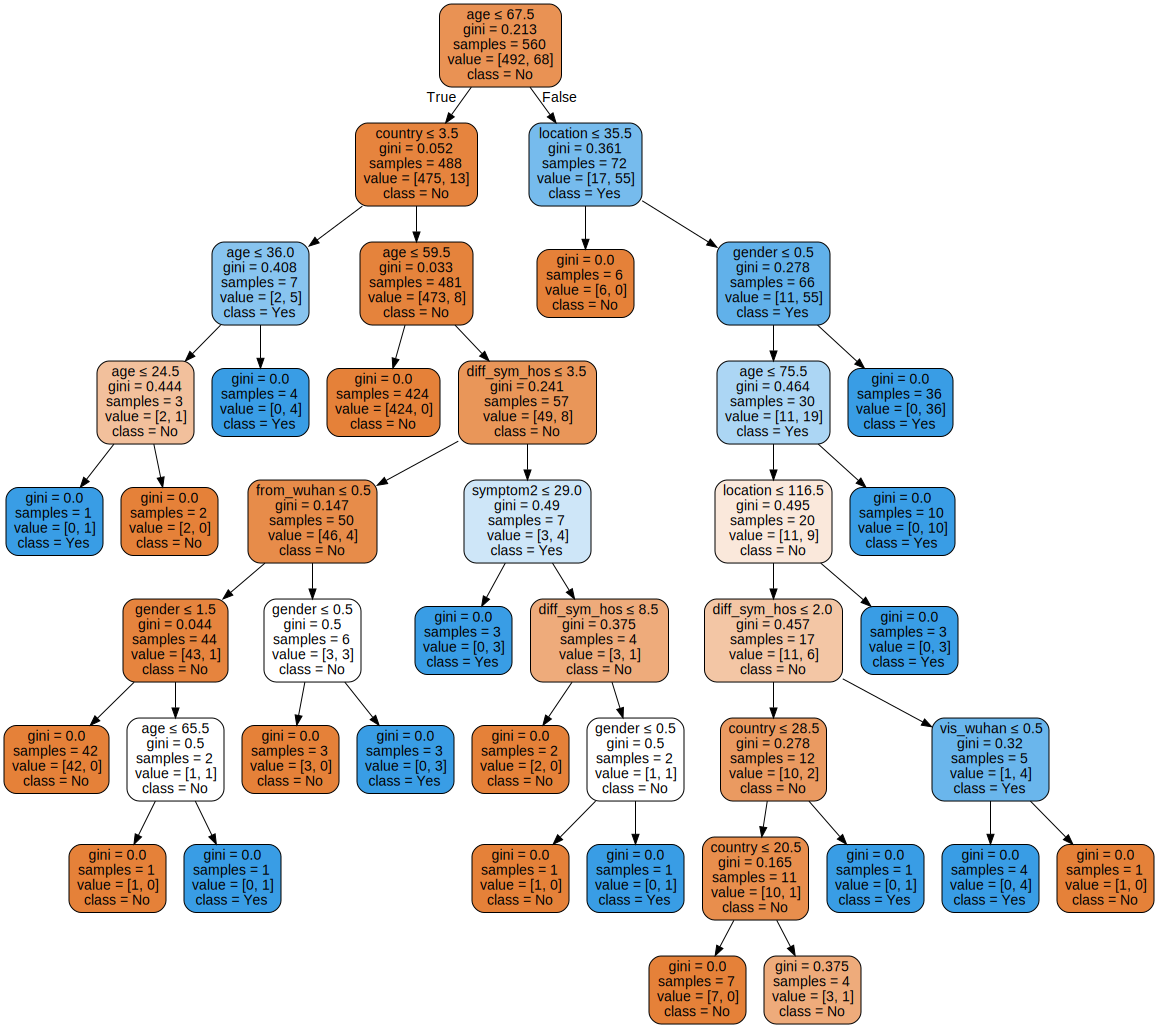

In [76]:
y_predict=tree_clf.fit(X_train, y_train)
dot_data = export_graphviz(tree_clf, out_file=None,
                           feature_names=X.columns,
                           class_names=['No', 'Yes'],
                           filled=True, rounded=True,
                           special_characters=True) 
graph = graphviz.Source(dot_data)
graph

# ROC  DECISION TREE


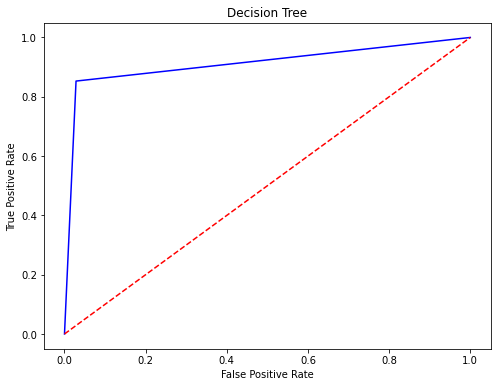

Area Under the Curve is:  0.9122429459588713


In [77]:
y_scores = cross_val_predict(tree_clf,X_train,y_train, cv=5)
fpr_DT, tpr_DT, threshold_DT = roc_curve(y_train, y_scores)
plt.figure(figsize = (8,6))
plt.plot(fpr_DT, tpr_DT, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.title("Decision Tree")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()
AUC_of_Decision_Tree = roc_auc_score(y_train, y_scores)
print("Area Under the Curve is: " , AUC_of_Decision_Tree)

 # Comparing AUC of KNN & NB & LR & DT

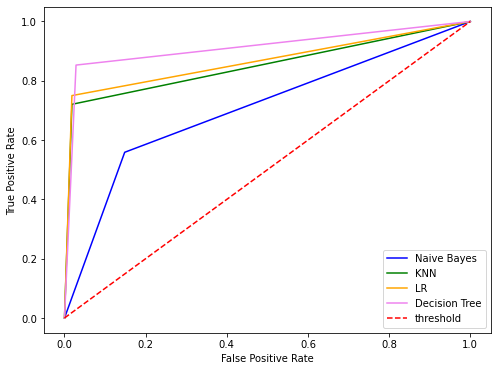

In [78]:
plt.figure(figsize = (8,6))
plt.plot(fpr_NB, tpr_NB, 'b')
plt.plot(fpr, tpr, 'g')
plt.plot(fpr_log,tpr_log,'orange')
plt.plot(fpr_DT,tpr_DT,'violet')
plt.plot([0, 1], [0, 1],'r--')
plt.legend(["Naive Bayes", "KNN" ,"LR","Decision Tree" ,"threshold"], loc ="lower right")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [79]:
print("Area Under the Curve in Logistic regression is: " , AUC_of_LR)
print("Area Under the Curve in KNN is: " , AUC_of_knn)
print("Area Under the Curve in Naive Bayes is: " , AUC_of_Naive_Bayes)
print("Area Under the Curve in  Decision Tree is: " , AUC_of_Decision_Tree)


Area Under the Curve in Logistic regression is:  0.8658536585365854
Area Under the Curve in KNN is:  0.8511477761836442
Area Under the Curve in Naive Bayes is:  0.7052247728359636
Area Under the Curve in  Decision Tree is:  0.9122429459588713


# Applying support vector machines


In [80]:
clf = SVC(kernel='linear') 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# recall and precision without hyper parameter tuning

In [81]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9310344827586207
Precision: 0.8888888888888888
Recall: 0.42105263157894735


# hyperparameter tuning using gridsearchCV

In [82]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_valid,y_valid)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

# printing the best hyper parameters

In [83]:
print(grid.best_estimator_)

SVC(C=1, gamma=0.001, kernel='poly')


   # applying support vector machines with the hyper parameters

In [84]:
clf = SVC(kernel='poly',gamma=0.001, C=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# printing the classification report the best hyperparameters

In [85]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))


Accuracy: 0.9655172413793104
Precision: 0.9333333333333333
Recall: 0.7368421052631579


# ROC OF SVM

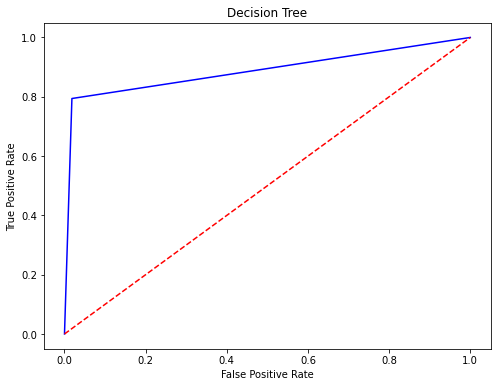

Area Under the Curve is:  0.8879124820659969


In [86]:
y_scores = cross_val_predict(clf,X_train,y_train, cv=5)
fpr_SVM, tpr_SVM, threshold_SVM = roc_curve(y_train, y_scores)
plt.figure(figsize = (8,6))
plt.plot(fpr_SVM, tpr_SVM, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.title("Decision Tree")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()
AUC_of_Support_Vector_Machine = roc_auc_score(y_train, y_scores)
print("Area Under the Curve is: " , AUC_of_Support_Vector_Machine)

 # Comparing AUC of KNN & NB & LR & DT &SVM

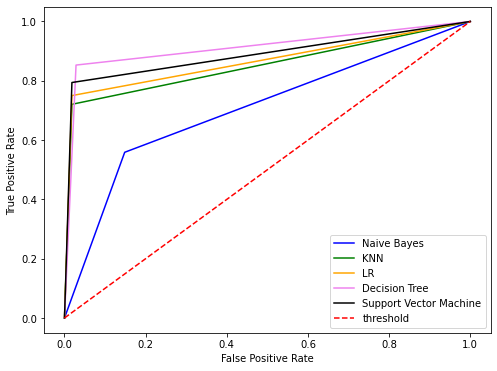

In [87]:
plt.figure(figsize = (8,6))
plt.plot(fpr_NB, tpr_NB, 'b')
plt.plot(fpr, tpr, 'g')
plt.plot(fpr_log,tpr_log,'orange')
plt.plot(fpr_DT,tpr_DT,'violet')
plt.plot(fpr_SVM,tpr_SVM,'black')
plt.plot([0, 1], [0, 1],'r--')
plt.legend(["Naive Bayes", "KNN" ,"LR","Decision Tree","Support Vector Machine" ,"threshold"], loc ="lower right")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [88]:
print("Area Under the Curve in Logistic regression is: " , AUC_of_LR)
print("Area Under the Curve in KNN is: " , AUC_of_knn)
print("Area Under the Curve in Naive Bayes is: " , AUC_of_Naive_Bayes)
print("Area Under the Curve in  Decision Tree is: " , AUC_of_Decision_Tree)
print("Area Under the Curve in  Support Vector Machine is: " , AUC_of_Support_Vector_Machine)


Area Under the Curve in Logistic regression is:  0.8658536585365854
Area Under the Curve in KNN is:  0.8511477761836442
Area Under the Curve in Naive Bayes is:  0.7052247728359636
Area Under the Curve in  Decision Tree is:  0.9122429459588713
Area Under the Curve in  Support Vector Machine is:  0.8879124820659969
